In [1]:
# libraries install

# !pip install xgboost
# !pip install catboost
# !pip install lightgbm
# !pip install plotly
# !pip install eli5
# !pip install shap
# !pip install pycaret
# !pip install matplotlib
# !pip install missingno

In [2]:
# libraries import

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# import warnings
# warnings.filterwarnings("ignore")
import seaborn as sns

import fancyimpute
from fancyimpute import KNN

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from catboost import CatBoostClassifier
import lightgbm as lgb
from joblib import dump, load
import shap
from scipy.stats import chi2_contingency

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as py
py.init_notebook_mode(connected=True)

from pycaret.classification import *

import eli5
from eli5.sklearn import PermutationImportance

In [3]:
# data load
data = pd.read_csv("C:/Users/aliak/Downloads/mrk_data.csv", skipinitialspace = True)
data2 = pd.read_csv("C:/Users/aliak/Downloads/mrk_data.csv", skipinitialspace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
# check the data size

data.shape

(32581, 12)

In [5]:
# EDA

In [6]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
data.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
person_age,32581.0,27.734600,6.348078,20.00,22.00,22.00,23.00,26.00,30.00,32.00,36.000,40.00,50.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,22880.00,28590.00,38500.00,55000.00,79200.00,86000.00,110004.000,138000.00,225200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,0.00,0.00,2.00,4.00,7.00,8.00,10.000,13.00,18.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,2000.00,3000.00,5000.00,8000.00,12200.00,14500.00,19000.000,24000.00,29800.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,6.03,6.91,7.90,10.99,13.47,13.92,15.298,16.32,18.62,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.000,1.00,1.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.04,0.05,0.09,0.15,0.23,0.25,0.320,0.38,0.50,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,2.00,2.00,3.00,4.00,8.00,9.00,11.000,14.00,17.00,30.00


In [8]:
# 'loan_int_rate' describes the Interest Rate offered on Loans by Banks or any financial institution. There is no fixed value as it varies from bank to bank. Hence I am removing this column for our analysis.

In [9]:
data.drop(['loan_int_rate'],axis=1,inplace=True)

In [10]:
# checking the distribution #https://www.kaggle.com/code/zhaoyunma/credit-risk-prediction

In [11]:
# numerical variables
numerical = pd.DataFrame(data[data.select_dtypes(include=['float', 'int']).columns])
# print the numerical variebles
numerical.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [12]:
categorical = pd.DataFrame(data[data.select_dtypes(include=['object']).columns])
categorical.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

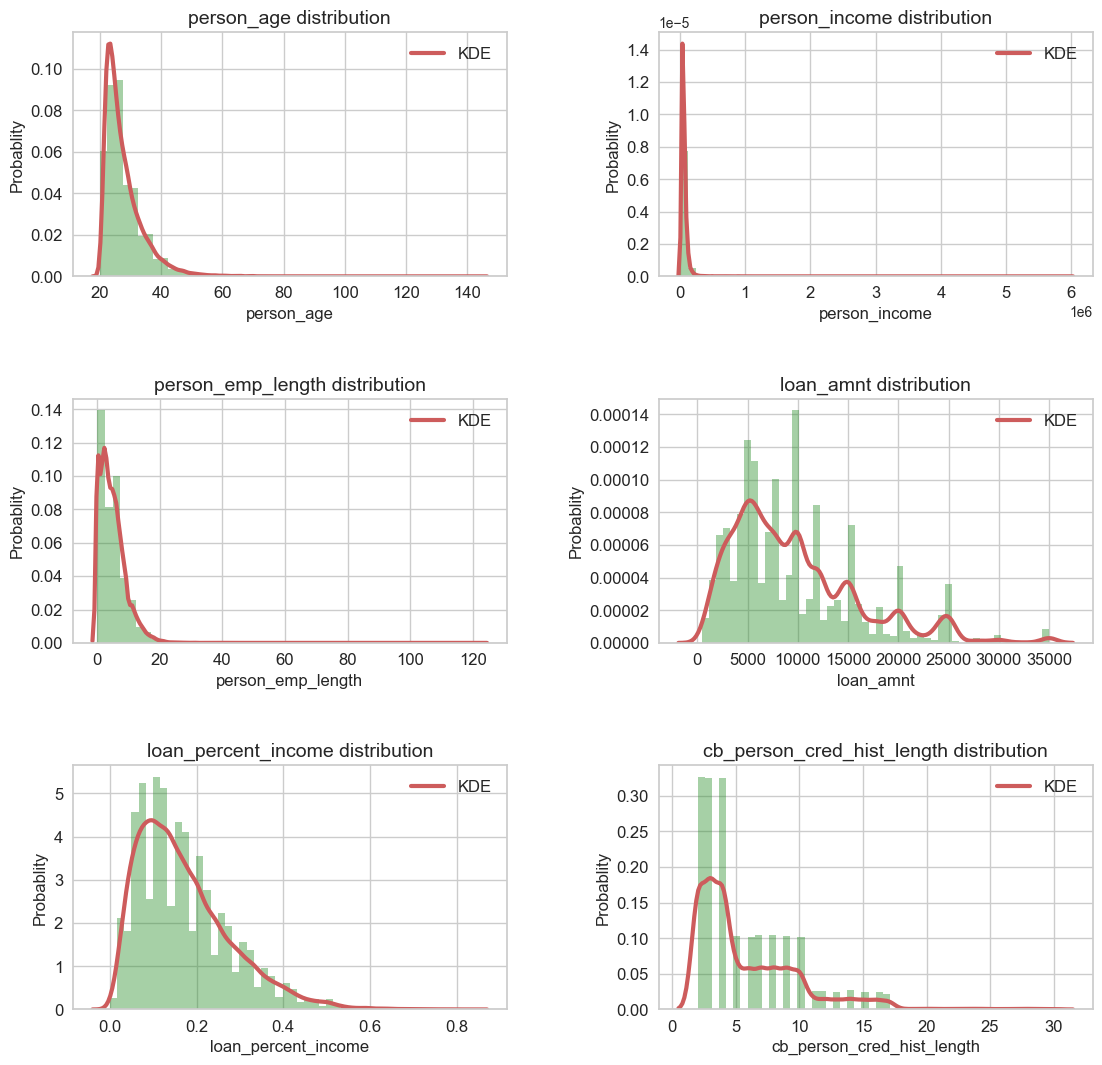

In [13]:
# drop the label column 'loan status' before visualization
numerical_hist = numerical.drop(['loan_status'], axis=1)
# visualize the distribution for each varieble
plt.figure(figsize=(12,16))

for i, col in enumerate(numerical_hist.columns):
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.distplot(numerical_hist[col], color='forestgreen', 
                 kde_kws={'color': 'indianred', 'lw': 3, 'label': 'KDE'})
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['KDE'], prop={"size":12})

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.35)
plt.show()

In [14]:
# target

data["loan_status"].describe()

count    32581.000000
mean         0.218164
std          0.413006
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

<AxesSubplot: ylabel='loan_status'>

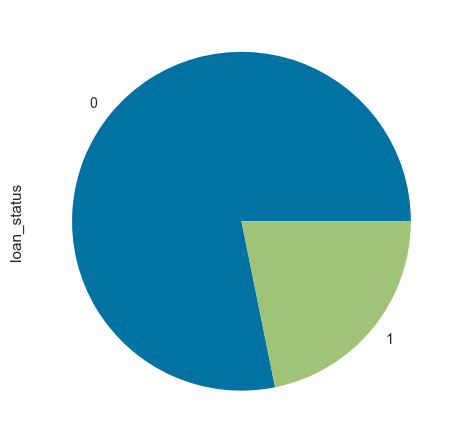

In [15]:
data["loan_status"].value_counts().plot.pie()

In [16]:
# We have more non-default loan than default loans in the dataset, this could require some work to aviod potential issues related to unbalance dataset.

In [17]:
# descriptive summaries of categorical data #https://www.kaggle.com/code/turanmehdiyeva/credit-risk-descriptive-statistical-analysis

In [18]:
data.describe(include = "O").T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [19]:
data.select_dtypes(include=['object','category']).columns.tolist()

data_cat = data.select_dtypes(include=['object','category'])
data_cat.count()

person_home_ownership        32581
loan_intent                  32581
loan_grade                   32581
cb_person_default_on_file    32581
dtype: int64

In [20]:
cat_col = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]
data[cat_col].mode()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,EDUCATION,A,N


In [21]:
categorical.count()

person_home_ownership        32581
loan_intent                  32581
loan_grade                   32581
cb_person_default_on_file    32581
dtype: int64

TypeError: countplot() got multiple values for argument 'data'

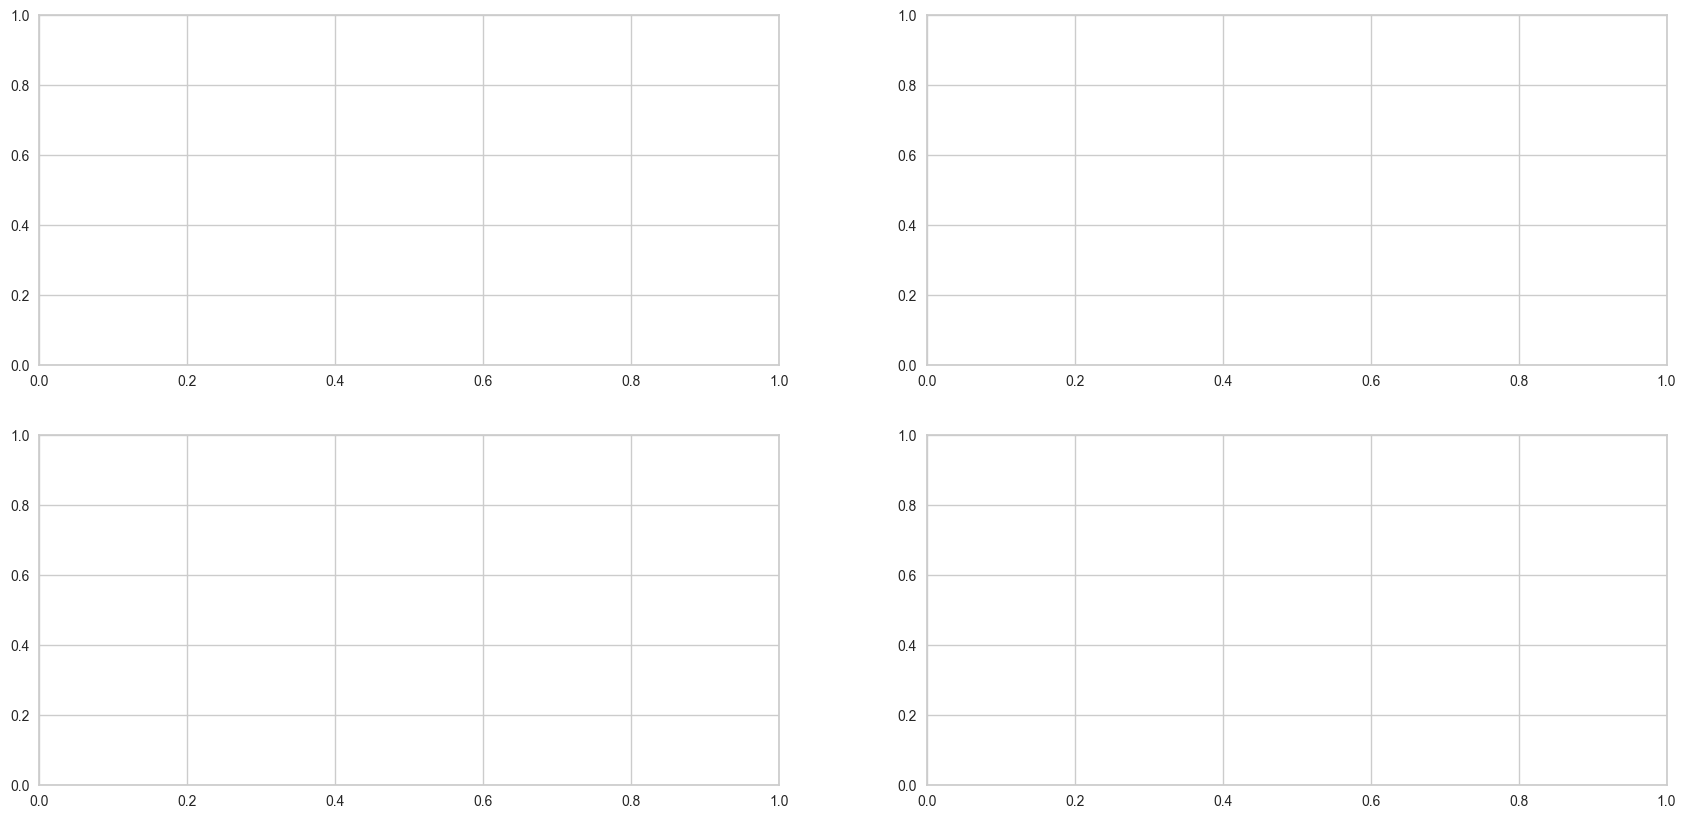

In [22]:
fig,axes = plt.subplots(2,2, figsize=(21,10))

sns.countplot('person_home_ownership',data=data, ax=axes[0,0],palette='CMRmap')
sns.countplot('loan_intent',data=df,ax=axes[0,1],palette='CMRmap')
sns.countplot('loan_grade',data=df,ax=axes[1,1],palette='CMRmap')
sns.countplot('cb_person_default_on_file',data=df,ax=axes[1,0],palette='CMRmap')

TypeError: countplot() got multiple values for argument 'data'

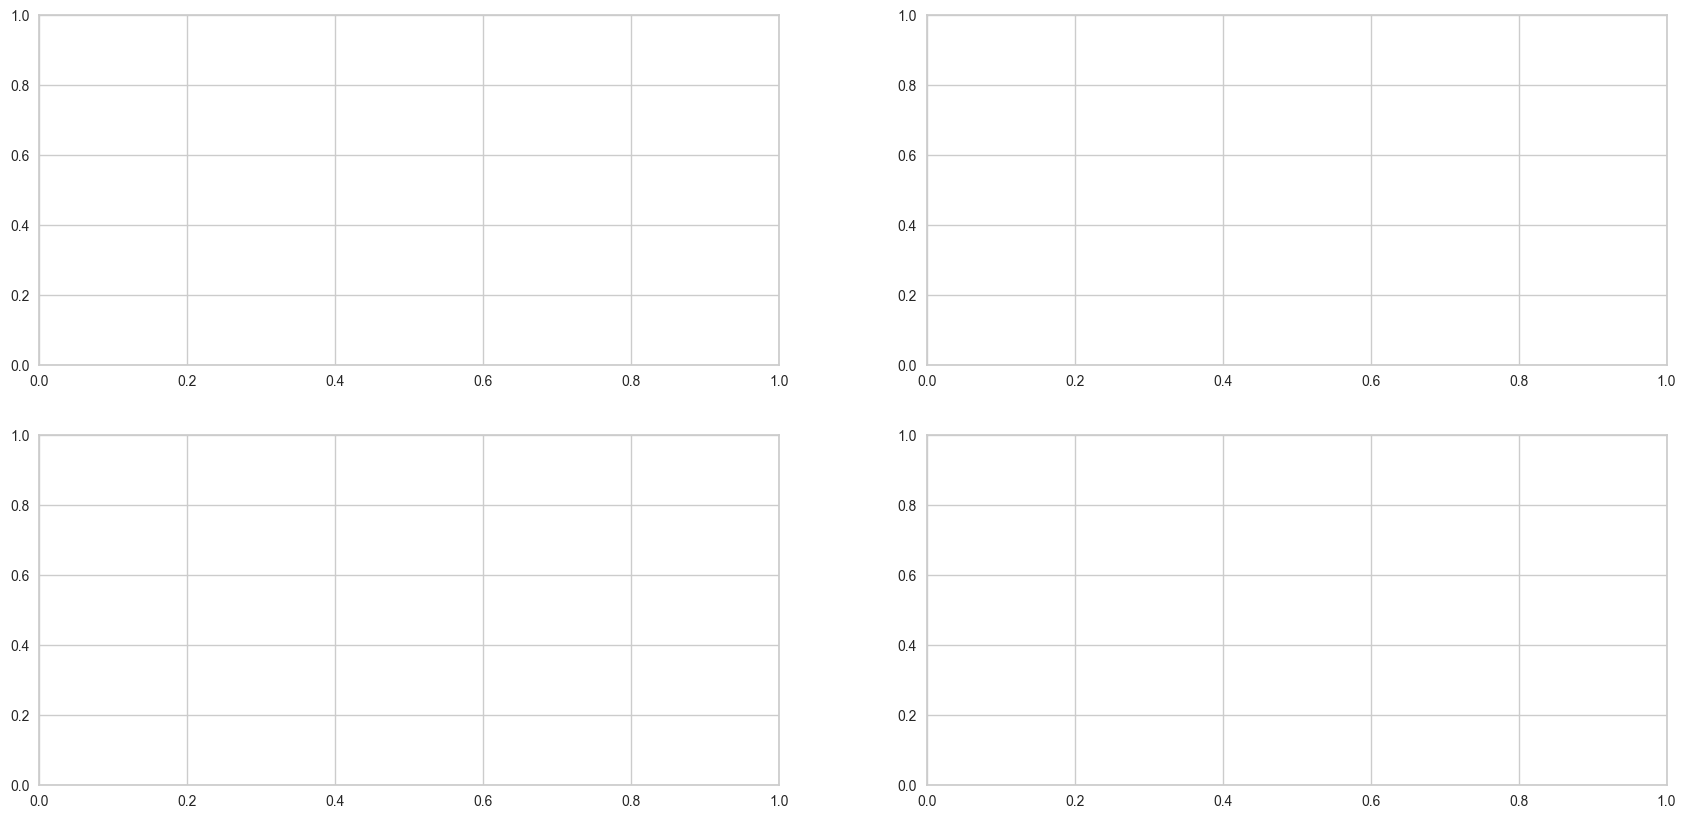

In [23]:
fig,axes = plt.subplots(2,2, figsize=(21,10))

sns.countplot('person_home_ownership',data=categorical, hue="loan_status",ax=axes[0,0],palette='CMRmap')
sns.countplot('loan_intent',data=categorical,hue="loan_status",ax=axes[0,1],palette='CMRmap')
sns.countplot('loan_grade',data=categorical,hue="loan_status",ax=axes[1,1],palette='CMRmap')
sns.countplot('cb_person_default_on_file',hue="loan_status",data=categorical,ax=axes[1,0],palette='CMRmap')

In [24]:
# correlations and associations between variables

In [25]:
# between categorical variables #https://www.kaggle.com/code/zhaoyunma/credit-risk-prediction

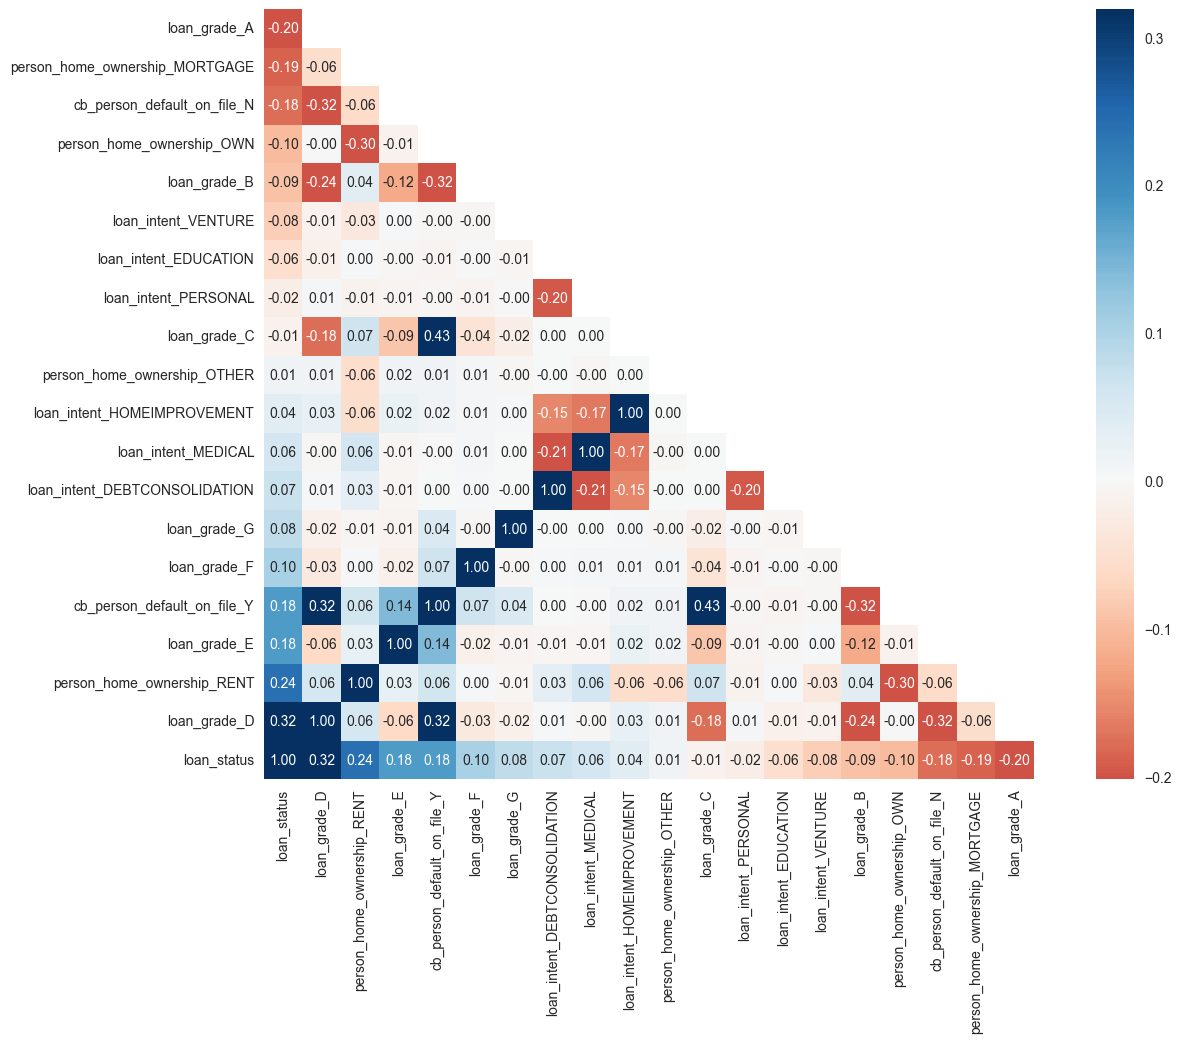

In [26]:
encoded_cat_cols = pd.get_dummies(categorical)
categorical_corr = pd.concat([encoded_cat_cols, data['loan_status']], axis=1)
corr = categorical_corr.corr().sort_values('loan_status', axis=1, ascending=False)
corr = corr.sort_values('loan_status', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.loan_status.min(), 
                     vmax=corr.drop(['loan_status'], axis=0).loan_status.max(), 
                     square=True, annot=True, fmt='.2f',
                     center=0, cmap='RdBu',annot_kws={"size": 10})

In [27]:
categorical_corr.corr().sort_values('loan_status', axis=1, ascending=False)

,loan_status,loan_grade_D,person_home_ownership_RENT,loan_grade_E,cb_person_default_on_file_Y,loan_grade_F,loan_grade_G,loan_intent_DEBTCONSOLIDATION,loan_intent_MEDICAL,loan_intent_HOMEIMPROVEMENT,person_home_ownership_OTHER,loan_grade_C,loan_intent_PERSONAL,loan_intent_EDUCATION,loan_intent_VENTURE,loan_grade_B,person_home_ownership_OWN,cb_person_default_on_file_N,person_home_ownership_MORTGAGE,loan_grade_A
person_home_ownership_MORTGAGE,-0.187637,-0.056539,-0.846200,-0.021626,-0.061605,-0.001779,0.006465,0.027442,-0.050451,0.050373,-0.048112,-0.064085,0.010279,-0.005588,-0.020624,-0.034651,-0.246000,0.061605,1.000000,0.133974
person_home_ownership_OTHER,0.012543,0.013803,-0.057952,0.015305,0.014264,0.007566,-0.002547,-0.000171,-0.004048,0.000275,1.000000,-0.005664,-0.000188,-0.005643,0.010179,-0.000370,-0.016847,-0.014264,-0.048112,-0.010710
person_home_ownership_OWN,-0.101960,-0.002015,-0.296315,-0.013041,-0.003468,-0.005453,-0.000195,-0.105771,-0.013853,0.011618,-0.016847,-0.004896,0.002461,0.004621,0.099253,-0.006052,1.000000,0.003468,-0.246000,0.017207
person_home_ownership_RENT,0.238430,0.055181,1.000000,0.026591,0.060902,0.003833,-0.005969,0.030164,0.057628,-0.055911,-0.057952,0.066397,-0.011430,0.003651,-0.034500,0.037432,-0.296315,-0.060902,-0.846200,-0.139993
loan_intent_DEBTCONSOLIDATION,0.071550,0.005310,0.030164,-0.005046,0.003508,0.004345,-0.000450,1.000000,-0.208832,-0.153924,-0.000171,0.001871,-0.197114,-0.216871,-0.201356,-0.009301,-0.105771,-0.003508,0.027442,0.005160
loan_intent_EDUCATION,-0.055348,-0.014978,0.003651,-0.002695,-0.007246,-0.001557,-0.006394,-0.216871,-0.237823,-0.175292,-0.005643,0.014861,-0.224477,1.000000,-0.229308,-0.007248,0.004621,0.007246,-0.005588,0.006466
loan_intent_HOMEIMPROVEMENT,0.036607,0.026691,-0.055911,0.020981,0.015489,0.006091,0.004240,-0.153924,-0.168795,1.000000,0.000275,-0.005292,-0.159323,-0.175292,-0.162751,-0.008673,0.011618,-0.015489,0.050373,-0.013818
loan_intent_MEDICAL,0.056595,-0.004425,0.057628,-0.005874,-0.001758,0.006525,0.000133,-0.208832,1.000000,-0.168795,-0.004048,0.002698,-0.216157,-0.237823,-0.220809,0.009897,-0.013853,0.001758,-0.050451,-0.008233
loan_intent_PERSONAL,-0.021094,0.007429,-0.011430,-0.007896,-0.003331,-0.010349,-0.001562,-0.197114,-0.216157,-0.159323,-0.000188,-0.009920,1.000000,-0.224477,-0.208418,0.007367,0.002461,0.003331,0.010279,0.001006
loan_intent_VENTURE,-0.078274,-0.014233,-0.034500,0.004184,-0.003478,-0.004052,0.005040,-0.201356,-0.220809,-0.162751,0.010179,-0.005987,-0.208418,-0.229308,1.000000,0.006312,0.099253,0.003478,-0.020624,0.007081


In [28]:
# between quantitive variables #https://www.kaggle.com/code/turanmehdiyeva/credit-risk-descriptive-statistical-analysis

In [29]:
data[numerical.columns].corr(method='pearson')

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.105376,0.572612,0.041967
loan_status,-0.021629,-0.144449,-0.082489,0.105376,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,-0.015529,-0.031690,1.000000


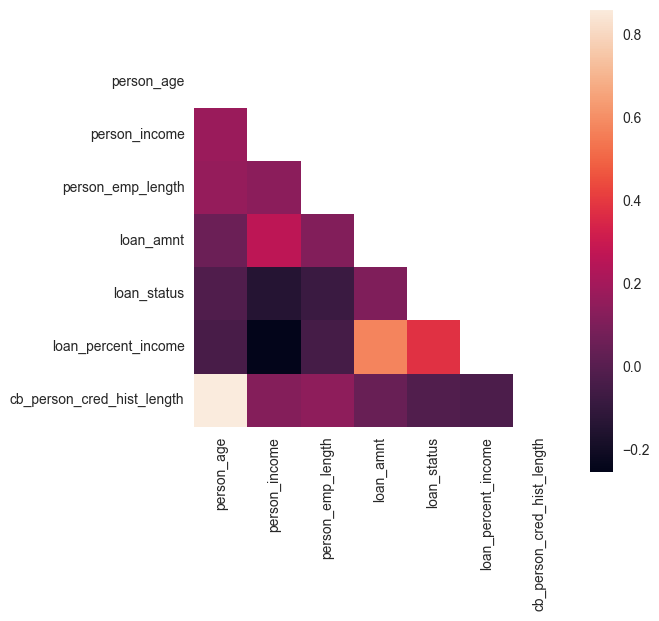

In [30]:
fig, ax = plt.subplots(figsize=(6,6))
mask = np.zeros_like(data[numerical.columns].corr(method='pearson'), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data[numerical.columns].corr(method='pearson'), mask=mask, square=True)
plt.show()

In [31]:
# variables with most correlation

# cb_person_cred_hist_length x person_age
# loan_percent_income x loan_amount
# person_income x loan_amount

In [32]:
# pearson correlation between categorical and numerical variables #https://www.kaggle.com/code/turanmehdiyeva/credit-risk-descriptive-statistical-analysis

In [33]:
label = preprocessing.LabelEncoder() 
data_encoded = pd.DataFrame() 

for i in data[categorical.columns] :
    data_encoded[i]=label.fit_transform(data[i]) #converting categorical data into integer format with LabelEncoder()

In [34]:
rows = {}
for var1 in data[numerical.columns]:
    values = [] 
    for var2 in data_encoded.columns:
        corr= data[var1].corr(data_encoded[var2])
        values.append(corr)
    rows[var1] = values

In [35]:
df = pd.DataFrame(rows, index=data_encoded.columns)
df

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length
person_home_ownership,-0.032506,-0.203177,-0.231736,-0.130776,0.211600,0.142129,-0.025534
loan_intent,0.035518,0.001527,0.021749,-0.004597,-0.065575,0.000986,0.035251
loan_grade,0.014218,-0.001022,-0.047276,0.145799,0.373080,0.123021,0.015069
cb_person_default_on_file,0.005807,-0.003613,-0.027728,0.039081,0.179141,0.035910,0.004564


<AxesSubplot: >

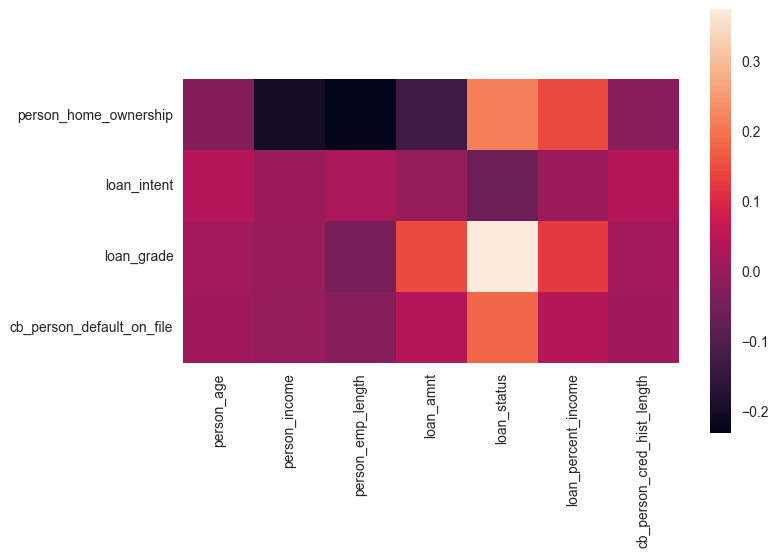

In [36]:
sns.heatmap(df, square=True)

In [37]:
# Dealing with Duplicates #https://www.kaggle.com/code/sudharshanravi/are-you-credible-lets-find-out#1.-Exploring-the-Dataset(EDA)

In [38]:
## Checking for Duplicates
dups = data.duplicated()
dups.value_counts()

False    32405
True       176
dtype: int64

In [39]:
## Removing the Duplicates
print(f"Shape of Data before removing duplicates -----> ({data.shape[0]},{data.shape[1]}) \n")
data.drop_duplicates(inplace=True)
print(f"Shape of Data after removing duplicates -----> ({data.shape[0]},{data.shape[1]})")

Shape of Data before removing duplicates -----> (32581,11) 

Shape of Data after removing duplicates -----> (32405,11)


In [40]:
# Dealing with Null Values #https://www.kaggle.com/code/sudharshanravi/are-you-credible-lets-find-out#1.-Exploring-the-Dataset(EDA)

In [41]:
data.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             886
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [42]:
nan_per = data.isnull().sum()/data.shape[0]*100
nan_per.round(2)

person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.73
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

In [43]:
# There are two columns that contain missing values, we will think about how to deal with them later
# For our purpose, the loan status column will be the target variable and other columns could be used as features for classification

In [44]:
# The matrix plot is a great tool if you are working with depth-related data or time-series data. It provides a colour fill for each column. When data is present, the plot is shaded in grey (or your colour of choice), and when it is absent the plot is displayed in white.

In [45]:
import missingno as msno

<AxesSubplot: >

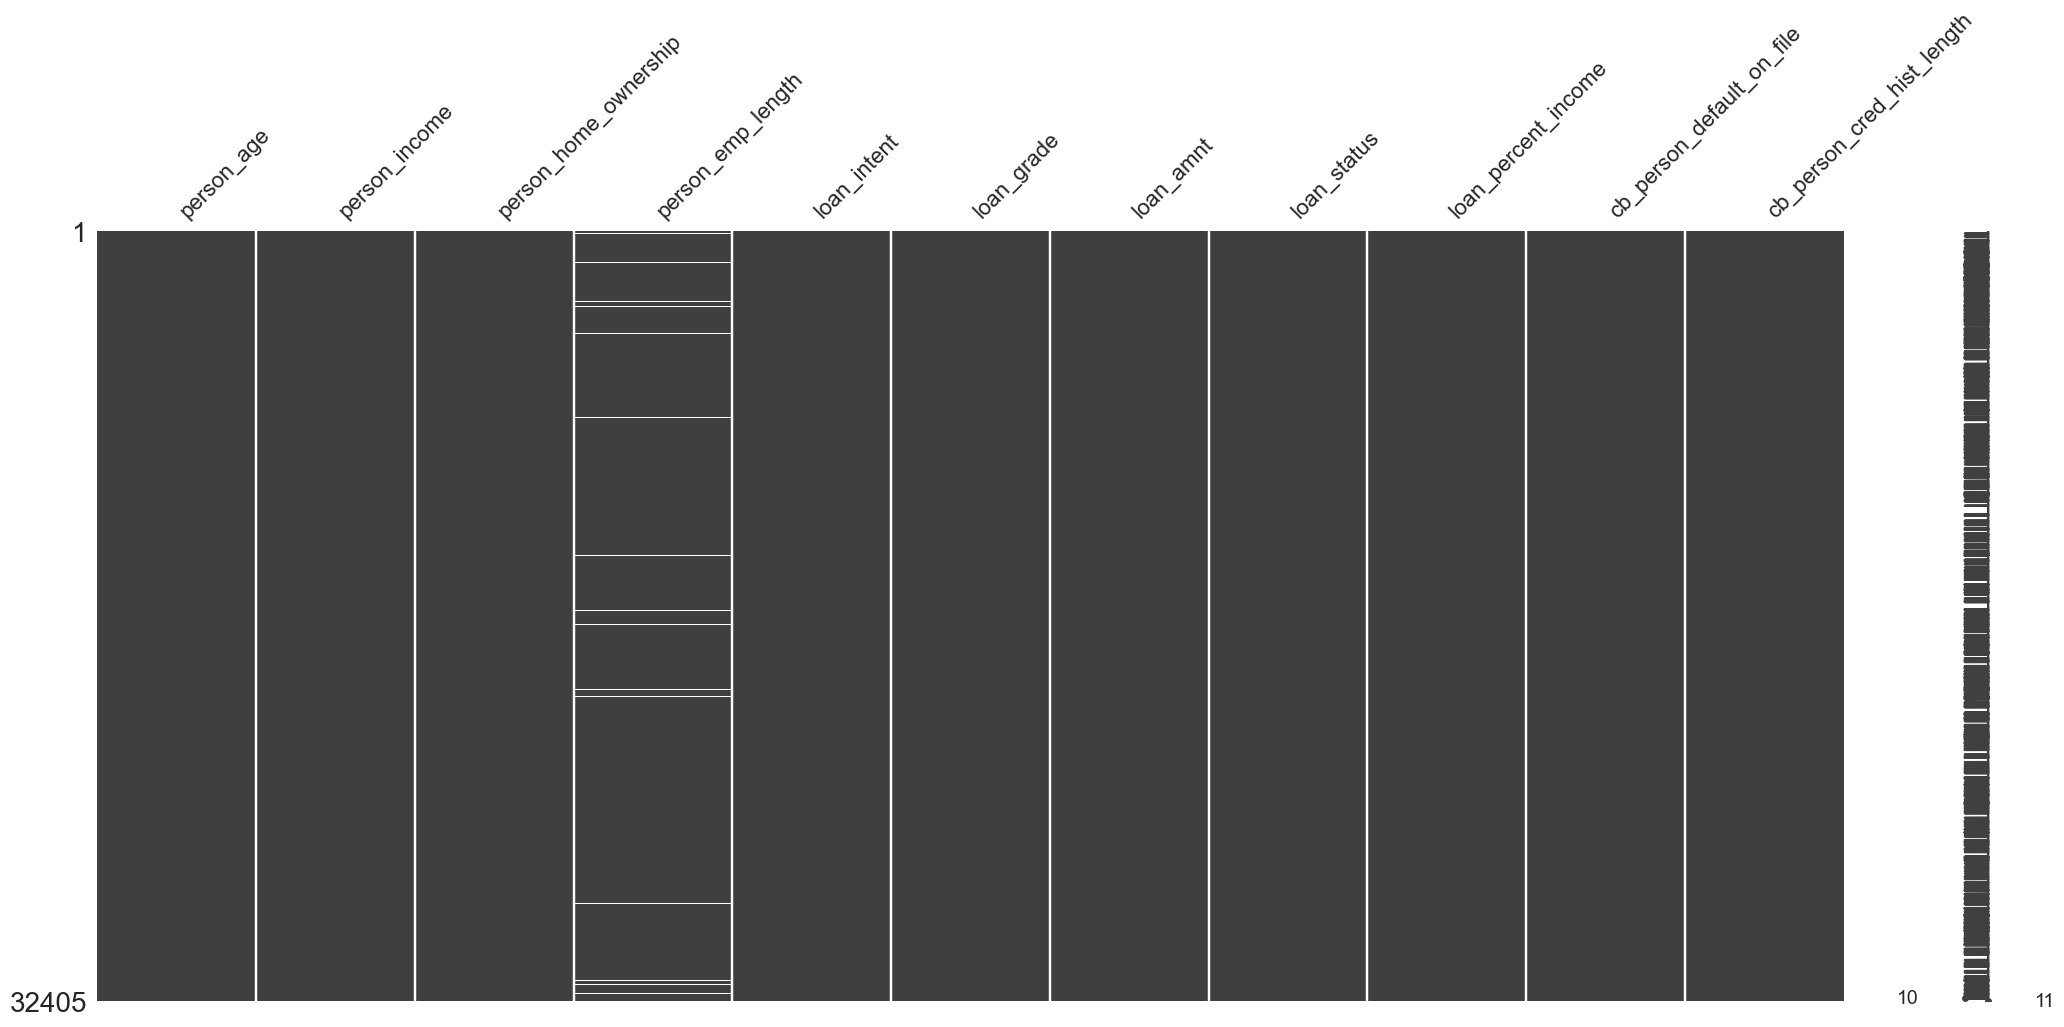

In [46]:
msno.matrix(data)

In [47]:
data = data.dropna() 

In [48]:
# Dealing with Outliers #https://www.kaggle.com/code/lc3287/credit-risk-analysis-voting-classifier

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.covariance import EllipticEnvelope

numeric_data = data.select_dtypes(include=['number'])

x = numeric_data.drop(['loan_status'], axis=1)
y = data['loan_status']

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

# Calculating the mean squared error
mse = mean_squared_error(y, y_pred)

# Detecting outliers using the Elliptic Envelope method
outlier_detector = EllipticEnvelope(contamination=0.1)
outlier_detector.fit(x)

# Identifying outliers
outliers = outlier_detector.predict(x) == -1

# Removing outliers from the dataset
data = data[~outliers]

# Printing the results
print("Mean Squared Error:", mse)
print("Outliers:", sum(outliers))

Mean Squared Error: 0.14155873358747065
Outliers: 3152


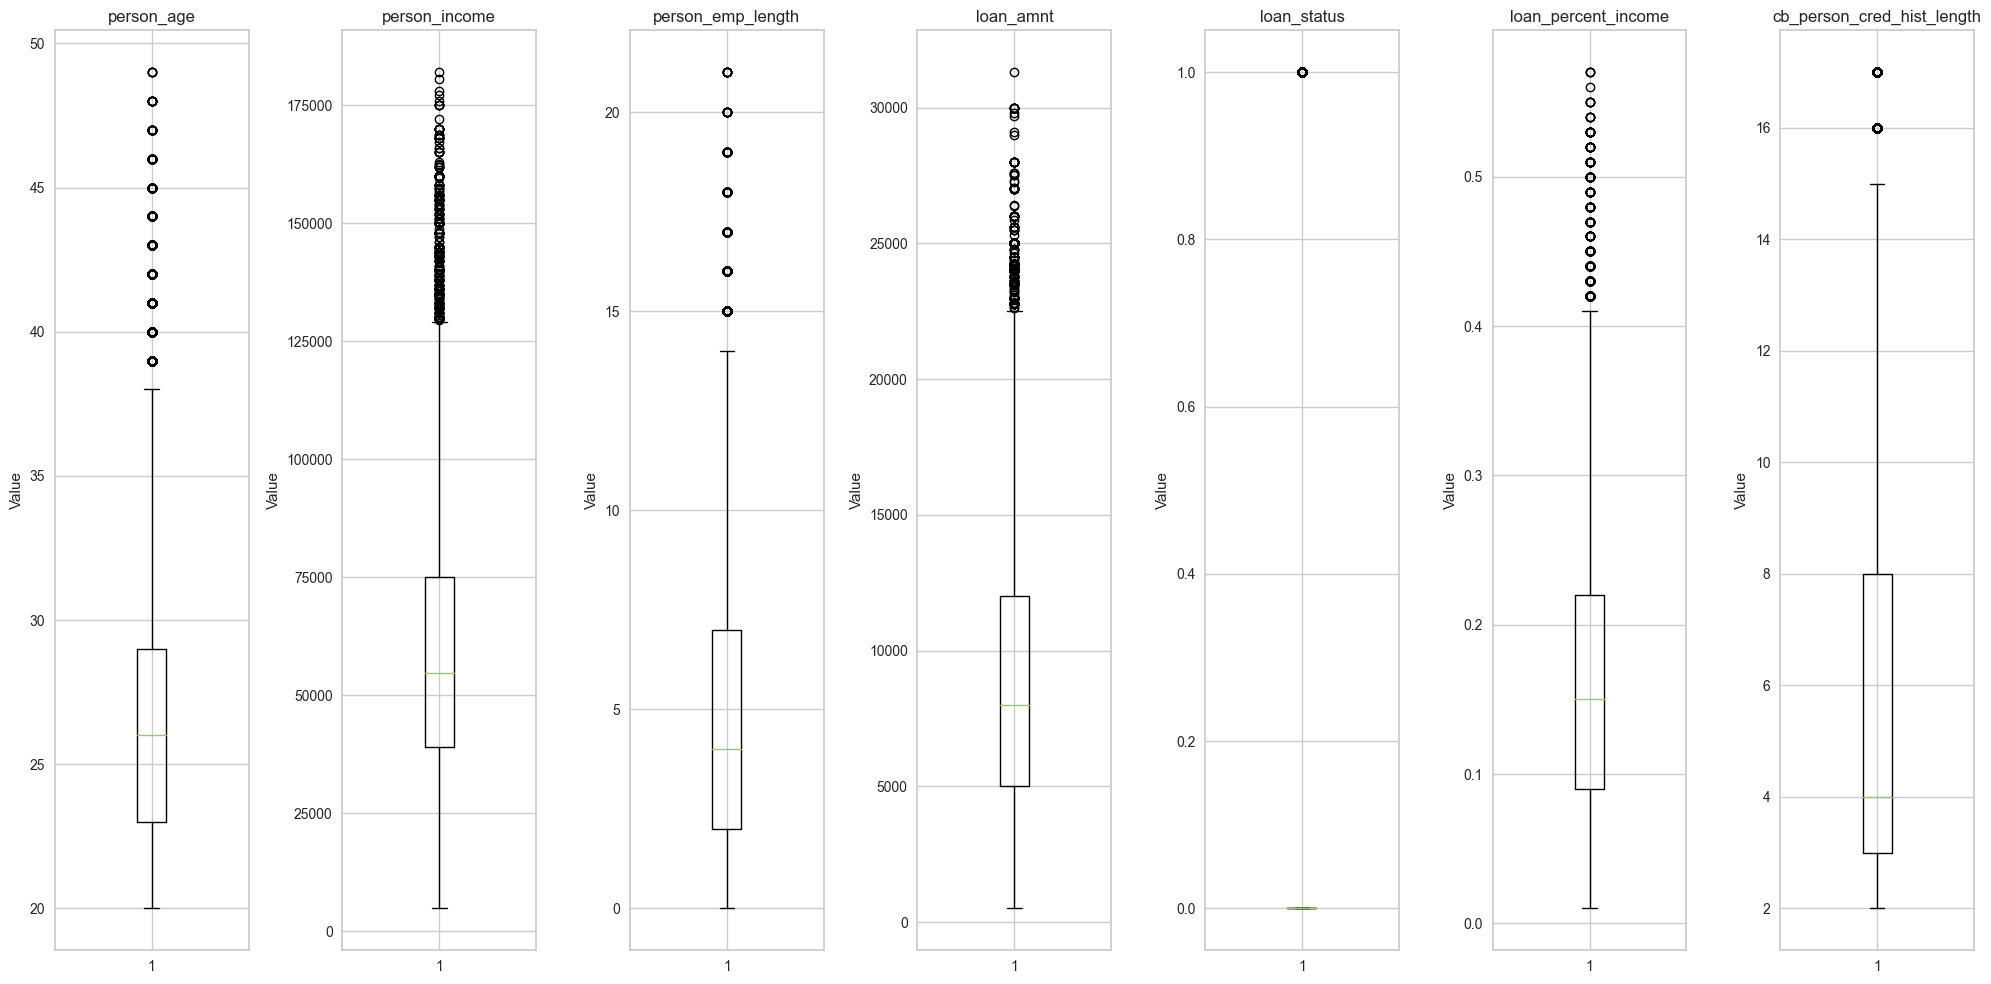

In [50]:
# Create a box plot to visualize outliers
numeric_data = data.select_dtypes(include=['number'])

# Create a figure to hold all the box plots
plt.figure(figsize=(20, 10))

# Loop through each column in the numeric data and create a box plot
for i, column in enumerate(numeric_data.columns):
    plt.subplot(1, len(numeric_data.columns), i + 1)
    plt.boxplot(numeric_data[column])
    plt.title(column)
    plt.ylabel('Value')

# Adjust layout
plt.tight_layout()

# Show the box plots
plt.show()

In [51]:
X = data.drop(['loan_status'], axis=1)
Y = data['loan_status']

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12)

In [53]:
print(x_train.shape,x_test.shape)

(22693, 10) (5674, 10)


In [54]:
x_train.reset_index(inplace = True)
x_test.reset_index(inplace = True)

In [55]:
x_train.columns

Index(['index', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [56]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(x_train[ohe_colums])

NameError: name 'ohe_colums' is not defined

In [60]:
ohe.categories_

AttributeError: 'OneHotEncoder' object has no attribute 'categories_'

In [ ]:
merge_ohe_col = np.concatenate((ohe.categories_[0], 
                ohe.categories_[1],
                ohe.categories_[2],
                ohe.categories_[3]))

In [ ]:
merge_ohe_col

In [ ]:
ohe_data = pd.DataFrame(ohe.transform(x_train[ohe_colums]).toarray(), columns=merge_ohe_col)
ohe_data2 = pd.DataFrame(ohe.transform(x_test[ohe_colums]).toarray(),columns=merge_ohe_col)

In [ ]:
X_new = pd.concat([ohe_data, x_train], axis=1)
X_new = X_new.drop(ohe_colums, axis=1)


X_new_test = pd.concat([ohe_data2, x_test], axis=1)
X_new_test = X_new_test.drop(ohe_colums, axis=1)

In [ ]:
X_new.head()
X_new.shape

In [ ]:
X_new_test.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','cb_person_cred_hist_length','loan_percent_income']

uniform_col= []

normal_col = ['person_income','person_age','person_emp_length', 'loan_amnt','cb_person_cred_hist_length','loan_percent_income']

bimodal_col = []


scaler_uniform = MinMaxScaler()
#X_new.loc[:,uniform_col] = scaler_uniform.fit_transform(X_new.loc[:,uniform_col])
#X_new_test.loc[:,uniform_col] = scaler_uniform.transform(X_new_test.loc[:,uniform_col])

scaler_normal = StandardScaler()
X_new.loc[:,normal_col] = scaler_normal.fit_transform(X_new.loc[:,normal_col])
X_new_test.loc[:,normal_col] = scaler_normal.transform(X_new_test.loc[:,normal_col])

scaler_bimodal = RobustScaler()
#X_new.loc[:,bimodal_col] = scaler_bimodal.fit_transform(X_new.loc[:,bimodal_col])
#X_new_test.loc[:,bimodal_col] = scaler_bimodal.transform(X_new_test.loc[:,bimodal_col])

In [ ]:
X_new_test.head()

In [ ]:
# Modelling #https://www.kaggle.com/code/anshtanwar/credit-risk-prediction/notebook#Modeling

In [ ]:
svc = SVC()
knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier(depth=7, iterations=300, l2_leaf_reg= 1, learning_rate= 0.1,verbose=0) #
lgb = lgb.LGBMClassifier(colsample_bytree= 0.7378703019867917,learning_rate= 0.007929963347654646,max_depth=5,min_child_weight= 0.05345076003503776,num_leaves= 20,subsample= 0.892939141154265) 

#best #colsample_bytree= 0.7378703019867917,learning_rate= 0.007929963347654646,max_depth=5,min_child_weight= 0.05345076003503776,num_leaves= 20,subsample= 0.892939141154265
#colsample_bytree= 1.0,learning_rate= 0.1,max_depth=11,min_child_weight= 1e-05,num_leaves= 1024,subsample=1.0

In [ ]:
clfs = {
    'KN' : knc, 
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

In [ ]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }

In [ ]:
from sklearn.metrics import precision_score,accuracy_score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
X_new = X_new.drop(columns=[col for col in X_new.columns if pd.isna(col)], axis=1)
X_new_test = X_new_test.drop(columns=[col for col in X_new_test.columns if pd.isna(col)], axis=1)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_new,y_train,X_new_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_new,y_train,X_new_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


knn = KNeighborsClassifier()
#xgb = XGBClassifier()
cat = CatBoostClassifier(verbose=0)
lgb = LGBMClassifier()


ensemble = VotingClassifier(estimators=[('knn', knn),  ('cat', cat), ('lgb', lgb)], voting='soft',verbose=0)
ensemble_accuracy, ensemble_precision = train_classifier(ensemble, X_new, y_train, X_new_test, y_test)

print("For ensemble")
print("Accuracy - ", ensemble_accuracy)
print("Precision - ", ensemble_precision)

In [ ]:
# Hyperparameter Tuning #https://www.kaggle.com/code/anshtanwar/credit-risk-prediction/notebook#Hyperparameter-Tuning

In [ ]:
from lightgbm import LGBMRegressor
# Evaluation and bayesian optimization
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
# !pip install hyperopt
# %pip install bayesian-optimization==1.4.1
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold, cross_val_score
from lightgbm import LGBMClassifier

In [ ]:
# Hyperparameter-tuning: Bayesian Optimization, bayes_opt
def lgbm_clf_bo(num_leaves, max_depth, learning_rate, min_child_weight, subsample, colsample_bytree):
    params_lgbm = {'objective': 'binary'}
    params_lgbm['num_leaves'] = round((2**round(max_depth))*num_leaves)
    params_lgbm['max_depth'] = round(max_depth)
    params_lgbm['learning_rate'] = learning_rate
    params_lgbm['min_child_weight'] = min_child_weight
    params_lgbm['subsample'] = subsample
    params_lgbm['colsample_bytree'] = colsample_bytree
    
    scores = cross_val_score(LGBMClassifier(random_state=12, **params_lgbm),
                             X_new, y_train, scoring='accuracy', cv=10).mean()
    return scores

# Set parameters distribution
params_lgbm ={
    'num_leaves':(0.5,0.9),
    'max_depth': (3, 15),
    'learning_rate': (0.005, 0.3),
    'min_child_weight':(1e-6, 1e-1),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.5, 1)
}

# Run Bayesian Optimization
lgbm_bo = BayesianOptimization(lgbm_clf_bo, params_lgbm)
lgbm_bo.maximize(init_points=2, n_iter=20)

In [ ]:
params_lgbm = lgbm_bo.max['params']
params_lgbm['max_depth'] = round(params_lgbm['max_depth'])
params_lgbm['num_leaves'] = round((2**round(params_lgbm['max_depth']))*params_lgbm['num_leaves'])
params_lgbm

In [ ]:
# Feature Importance #https://www.kaggle.com/code/anshtanwar/credit-risk-prediction/notebook#Feature-Importance

In [ ]:
clf = RandomForestRegressor()

clf.fit(X_new,y_train)

feature_scores = pd.Series(clf.feature_importances_, index=X_new.columns).sort_values(ascending=False)
feature_scores

In [ ]:
# AUTO ML #https://www.kaggle.com/code/anshtanwar/credit-risk-prediction/notebook#AUTO-ML

In [ ]:
data.head()

In [ ]:
model = setup(data = data, target = 'loan_status', session_id=123) 

In [57]:
compare_models()

ValueError: _CURRENT_EXPERIMENT global variable is not set. Please run setup() first.

In [58]:
model = setup(data = data2, target = 'loan_status', session_id=123)

,Description,Value
0,Session id,123
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(32581, 12)"
4,Transformed data shape,"(32581, 26)"
5,Transformed train set shape,"(22806, 26)"
6,Transformed test set shape,"(9775, 26)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,4


In [59]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9350,0.9458,0.7230,0.9716,0.8291,0.7900,0.8032,0.3940
xgboost,Extreme Gradient Boosting,0.9335,0.9456,0.7343,0.9496,0.8280,0.7876,0.7977,0.4440
rf,Random Forest Classifier,0.9319,0.9288,0.7124,0.9671,0.8203,0.7795,0.7934,1.0450
gbc,Gradient Boosting Classifier,0.9274,0.9271,0.7033,0.9512,0.8086,0.7650,0.7784,1.2270
et,Extra Trees Classifier,0.9181,0.9135,0.6780,0.9270,0.7831,0.7341,0.7478,1.1060
dt,Decision Tree Classifier,0.8844,0.8396,0.7602,0.7244,0.7416,0.6672,0.6677,0.1760
ada,Ada Boost Classifier,0.8821,0.8976,0.6322,0.7861,0.7006,0.6283,0.6342,0.4850
lda,Linear Discriminant Analysis,0.8614,0.8658,0.5749,0.7324,0.6440,0.5595,0.5659,0.1630
ridge,Ridge Classifier,0.8571,0.0000,0.5031,0.7609,0.6056,0.5227,0.5395,0.1290
knn,K Neighbors Classifier,0.8293,0.8018,0.4800,0.6467,0.5509,0.4483,0.4560,0.4300


In [ ]:
evaluate_model(best)

In [ ]:
pred_holdout = predict_model(best)